# Project-10 Heart Disease

Contents-

1- Problem Statment

2- About

3- Importing Important Libraries and Dataset

4- EDA- Exploratry Data Analsys
  
5- Visualization

6- Checking the Outlies by IQR Analysis

7- Feature Selection

    7.1 Correlation
    7.2 VIF - Variance Inflation Factor

8- Data PreProcessing and Data Spliting- Standard Scaler

9- Modeling

    9.1 Decison Tree Model
    9.2 Linear Regression Model
    9.3 Random Froest Model

10- Conclusions

# 1. Problem Statment

You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

# 2. About

This database contains 303 attributes, but all published experiments refer to using a subset of 14 of them.
In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" 
field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. 
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence
(values 1,2,3,4) from absence (value 0). 



# Complete attribute documentation:
      
      1 age: age in years
      2 sex: sex (1 = male; 0 = female)
      3 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      4 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
      5 chol: serum cholestoral in mg/dl
      6 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
      7 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      8 thalach: maximum heart rate achieved
      9 exang: exercise induced angina (1 = yes; 0 = no)
      10 oldpeak = ST depression induced by exercise relative to rest
      11 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
      12 ca: number of major vessels (0-3) colored by flourosopy
      13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
      14 target: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing


# 3. Importing  Libraries and Dataset

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Libaraies for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
data=pd.read_csv('heart.csv')

In [3]:
# check the basic informations.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 4. EDA- Exploratory Data Analysis

In [4]:
# check the null/nan values present in our dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# check the duplicated values
data.duplicated().sum()

1

In [6]:
# drop the duplicated values.
data=data.drop_duplicates()

In [7]:
# After drop of duplicated attribues new shape is 
data.shape

(302, 14)

In [8]:
# check the data types.
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# check the unique values.
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
# First Five Attribues of our data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Last five recoreds
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# check the 5 number summary
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#from the above 5number summary we can get infomation of Max,Min,Count,Quartile,Mean,Meadian etc.

In [13]:
# check the correlations.
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Above correlation tabel is showing the hisgest +ve correlation b/w CP and traget(0.432080) and -ve correlation b/w thalach and target (-0.419955) 

# 5. Visualization

In [14]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


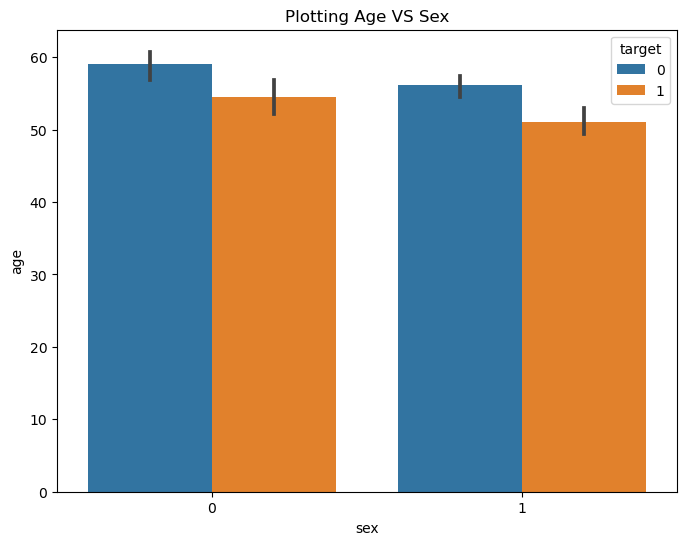

In [15]:
# plotting target and Age
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='sex',data=data,hue='target')
plt.title("Plotting Age VS Sex")
plt.show()

Above graph is showing that Females has less chance of heart deases as compare to male

In [16]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Text(0.5, 1.0, 'CP vs Age')

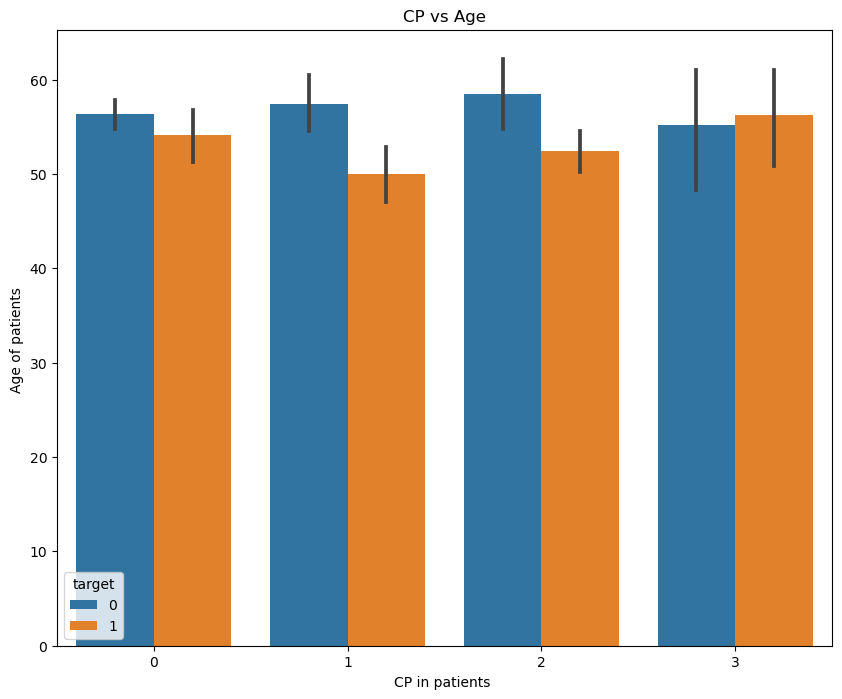

In [17]:
# Plotting CP vs Age
plt.figure(figsize=(10,8))
sns.barplot(x='cp',y='age',data=data,hue='target')
plt.ylabel("Age of patients ")
plt.xlabel("CP in patients ")
plt.title("CP vs Age")

Graph is showing 0:typical angina, 1: atypical angina, 2: non-anginal pain and 3: asymptomatic type of cp which is less in 
the persons

Text(0.5, 1.0, 'trestbps vs Age')

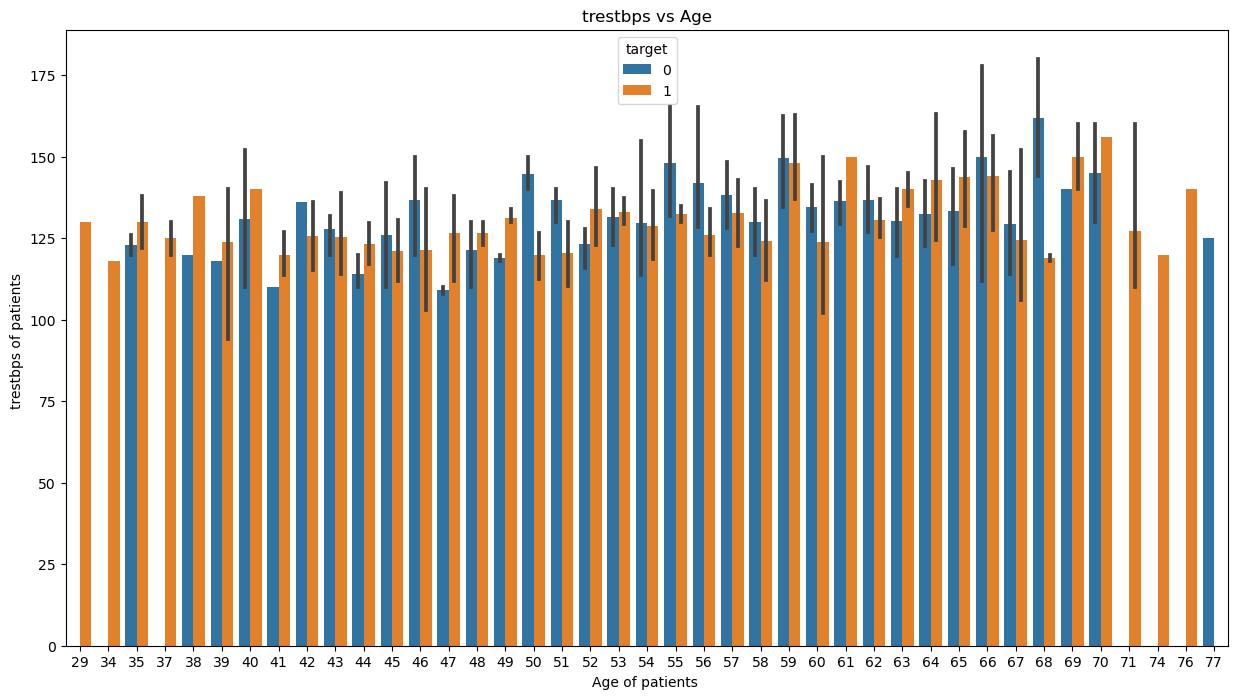

In [18]:
# Plotting CP vs Target
plt.figure(figsize=(15,8))
sns.barplot(y='trestbps',x='age',data=data,hue='target')
plt.xlabel("Age of patients ")
plt.ylabel("trestbps of patients ")
plt.title("trestbps vs Age")


as per above graph we can see that after age of 55 the blood presure of person's was litle bit high till age of 70.

Text(0.5, 1.0, 'thalach vs Age')

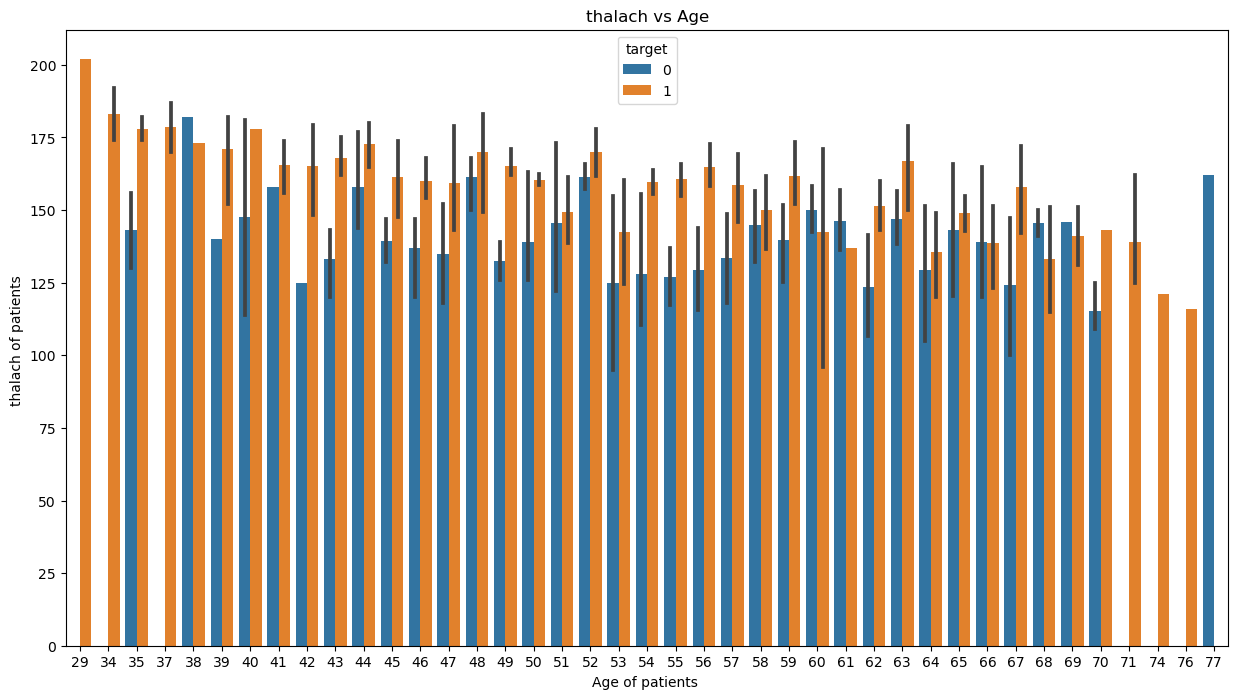

In [19]:
# Plotting CP vs Target
plt.figure(figsize=(15,8))
sns.barplot(y='thalach',x='age',data=data,hue='target')
plt.xlabel("Age of patients ")
plt.ylabel("thalach of patients ")
plt.title("thalach vs Age")


Above graph is showing the heartrat of persons, her the peples who's age from 29 to 52 has higher heart rate reading in which 
the highest change of Heart Deases od 38 years of people rest all have less change to have heart deases. Heart Rates are 
declines and it will high litlebit in between the years in 41,44,48,52 whoese have higher change of haveing heart deasexs.
after that its remain constant and at last it will high again in at 77.
    

# 6 Outlies Detection by IQR

In [20]:
col=data.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

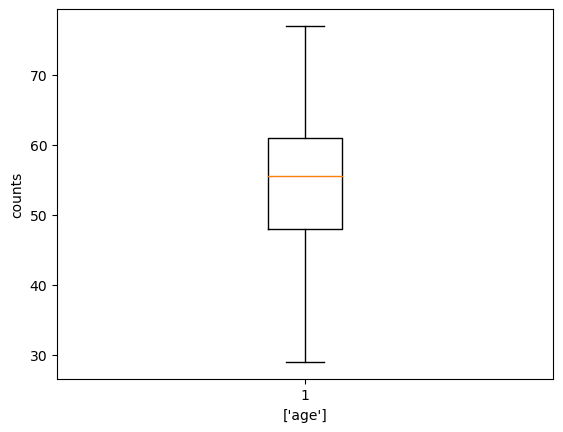

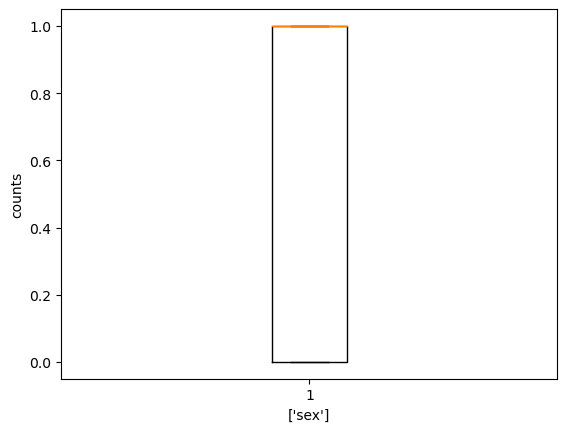

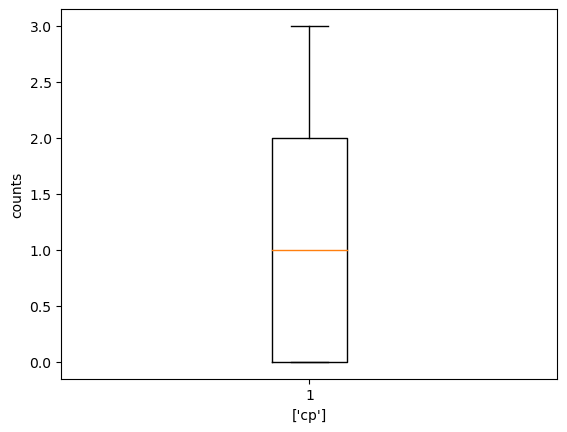

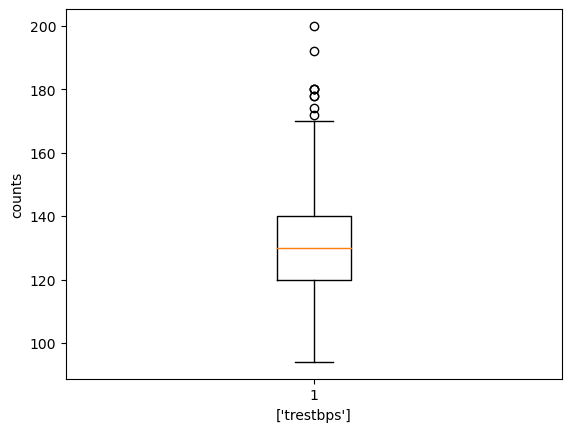

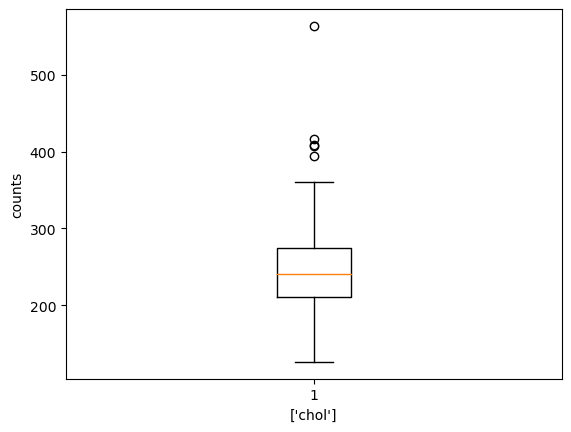

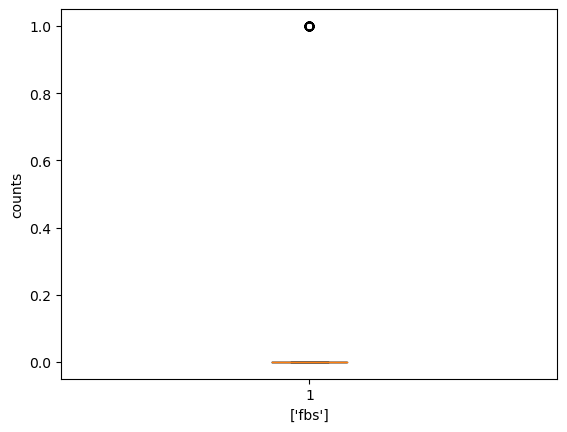

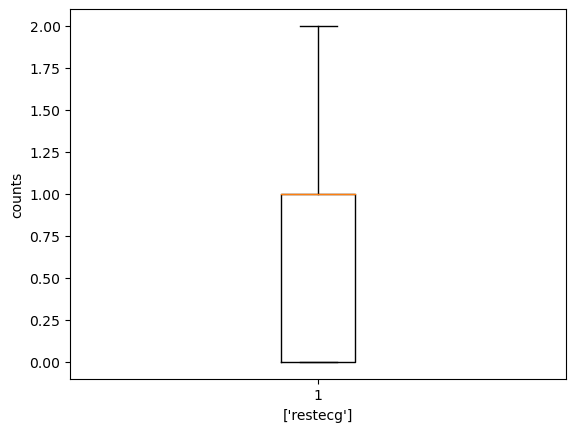

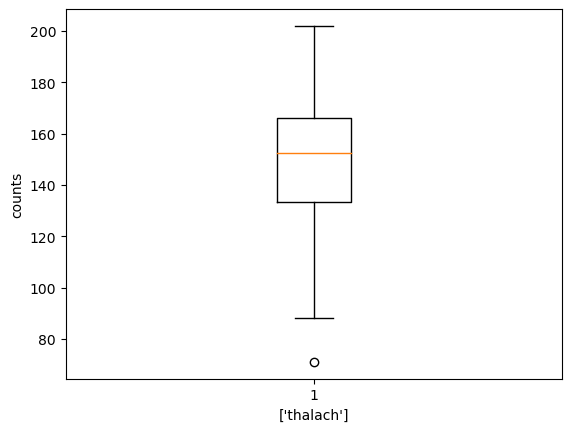

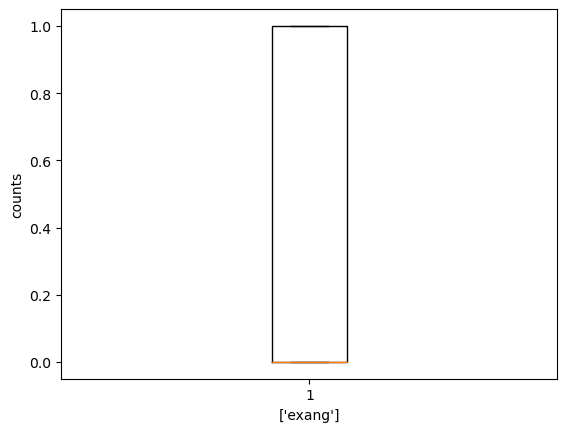

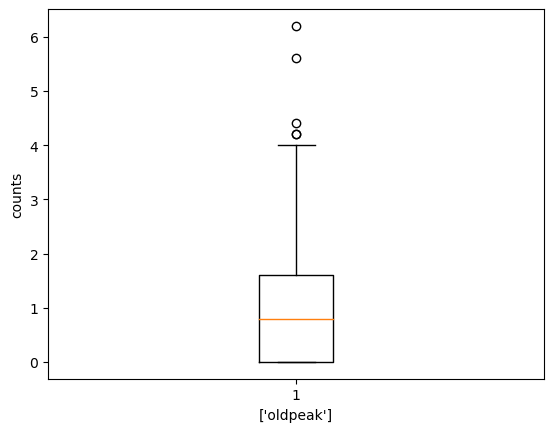

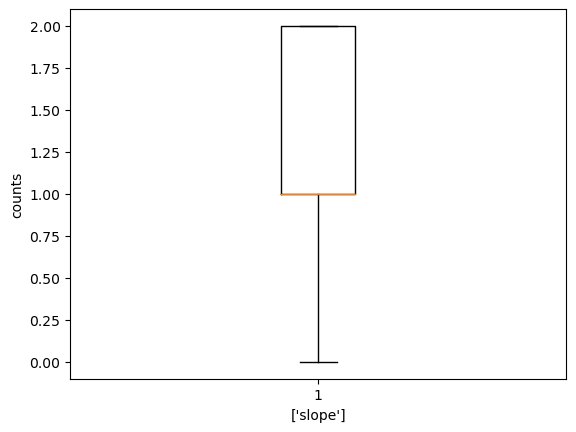

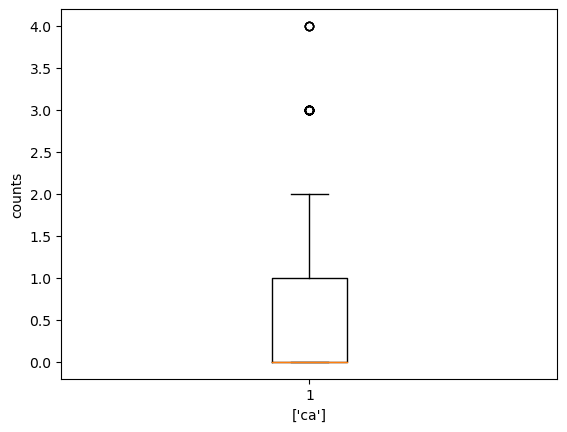

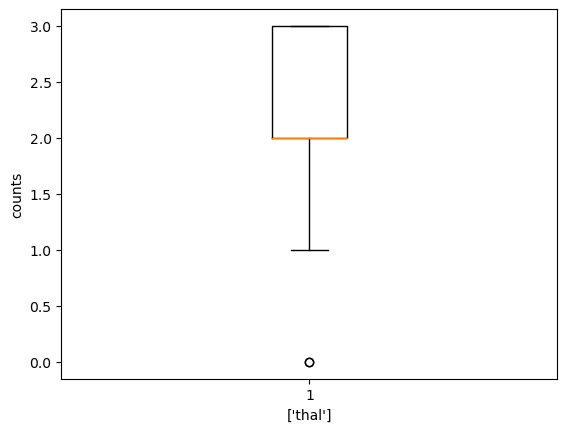

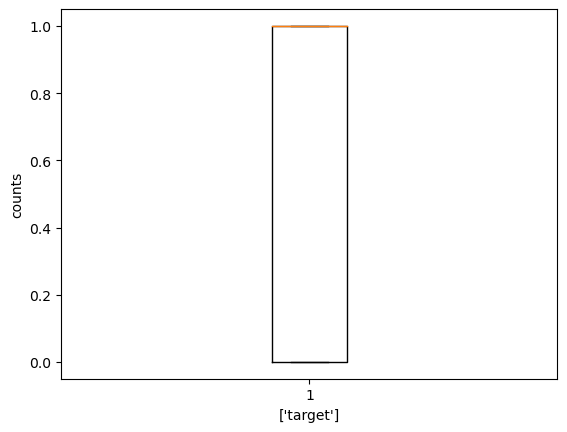

In [21]:
# Bargraphs ploting to check the outliers.
for i in col:
    plt.boxplot(data[i])
    plt.xlabel([i])
    plt.ylabel('counts')
    plt.show()

In [22]:
# features who have outliers values.
col_out=['trestbps','chol','thalach','oldpeak','ca','thal']

In [23]:
# Outliers Detections and removing by IQR(Inter Quartile Range)
for i in col_out:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    data=data[(data[i]>=LL)&(data[i]<=UL)]

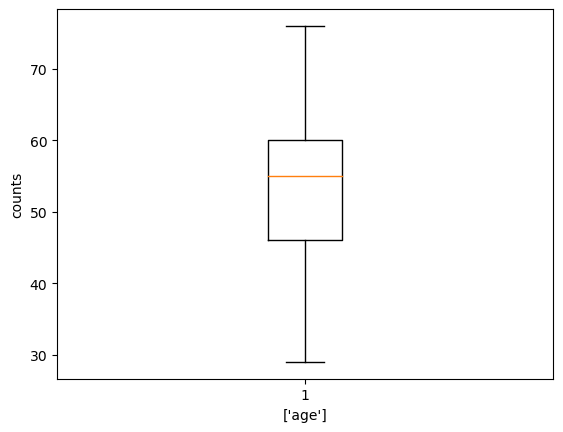

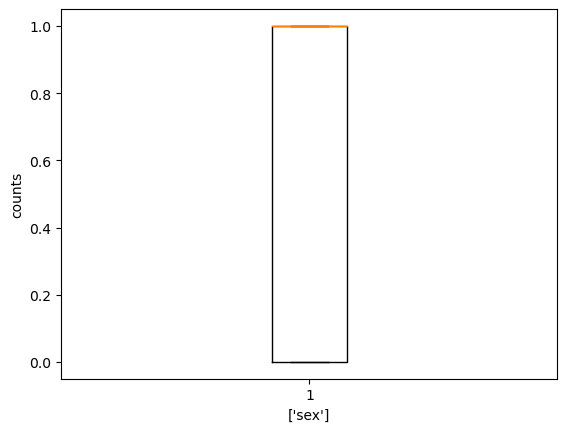

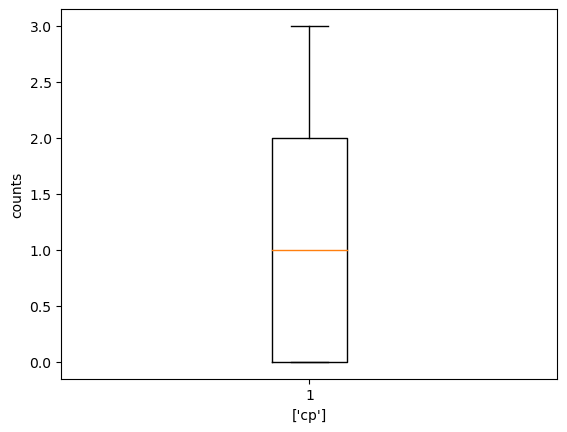

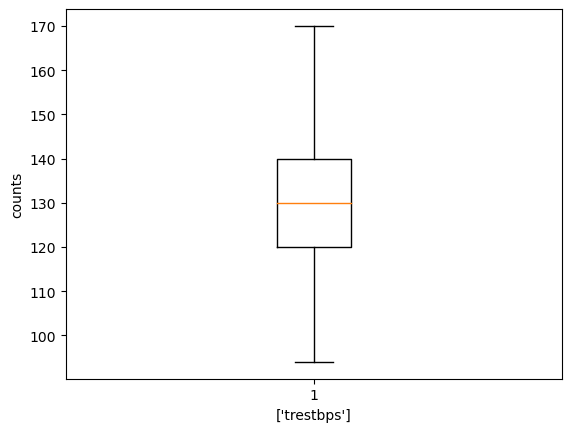

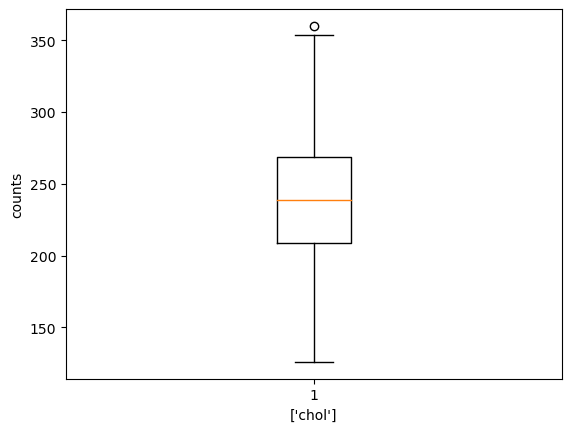

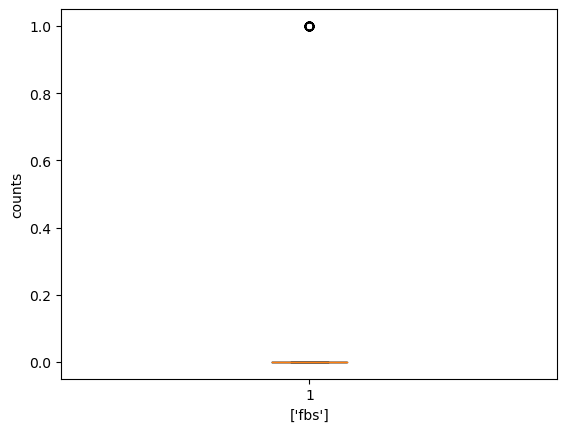

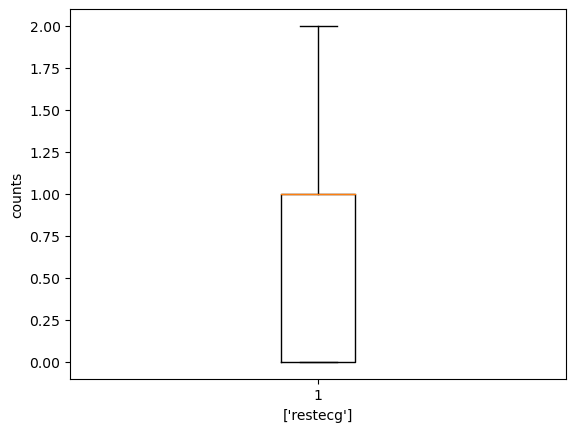

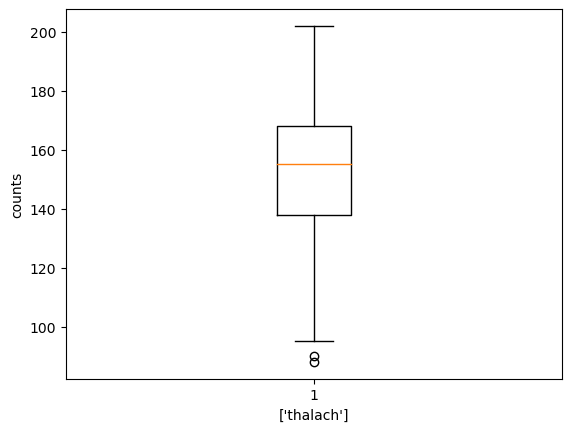

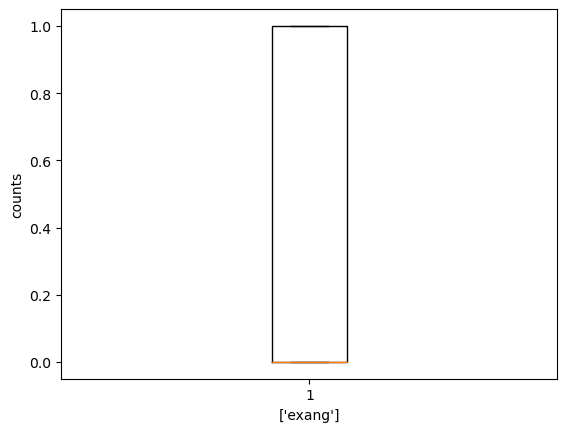

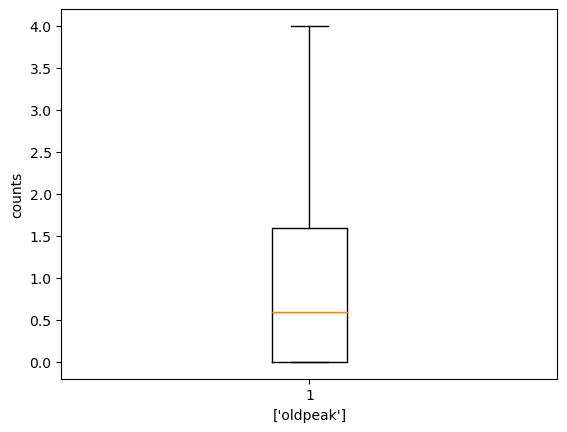

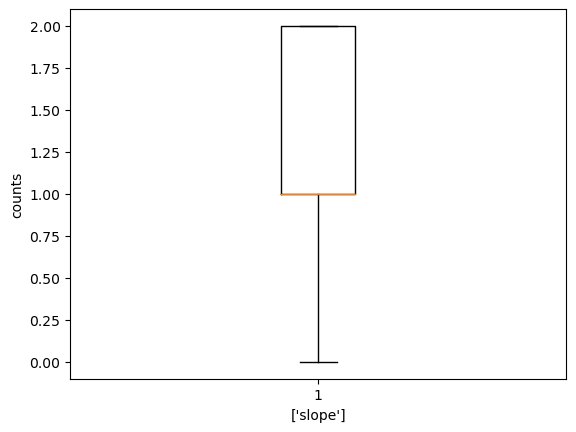

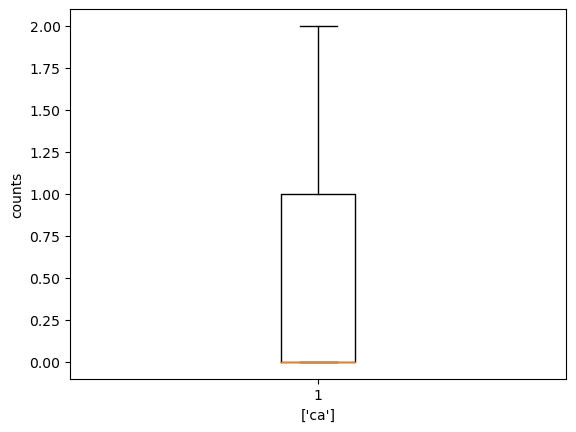

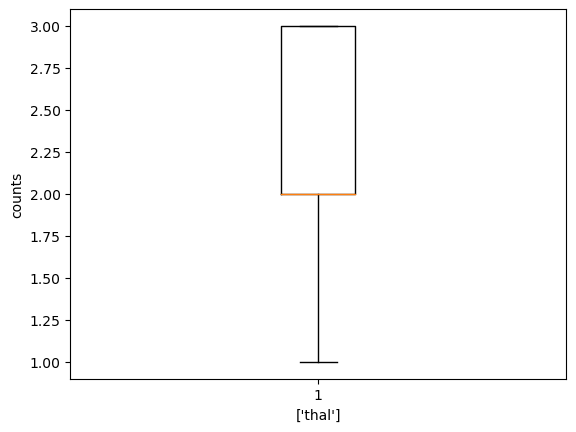

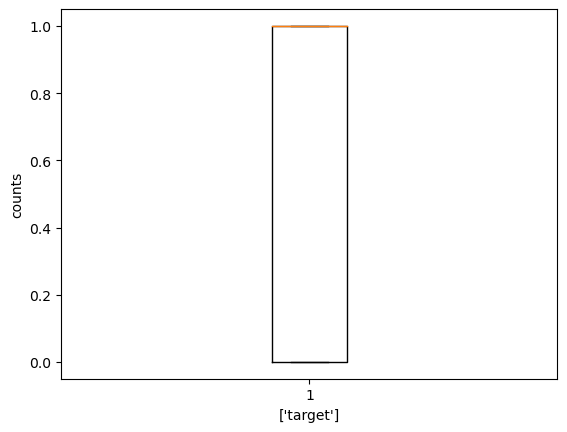

In [24]:
# Boxplot after outliers remove from data
for i in col:
    plt.boxplot(data[i])
    plt.xlabel([i])
    plt.ylabel('counts')
    plt.show()

In [25]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 7- Feature Selection

    8.2 VIF - Variance Inflation Factor


# 7.1 Correlation
    

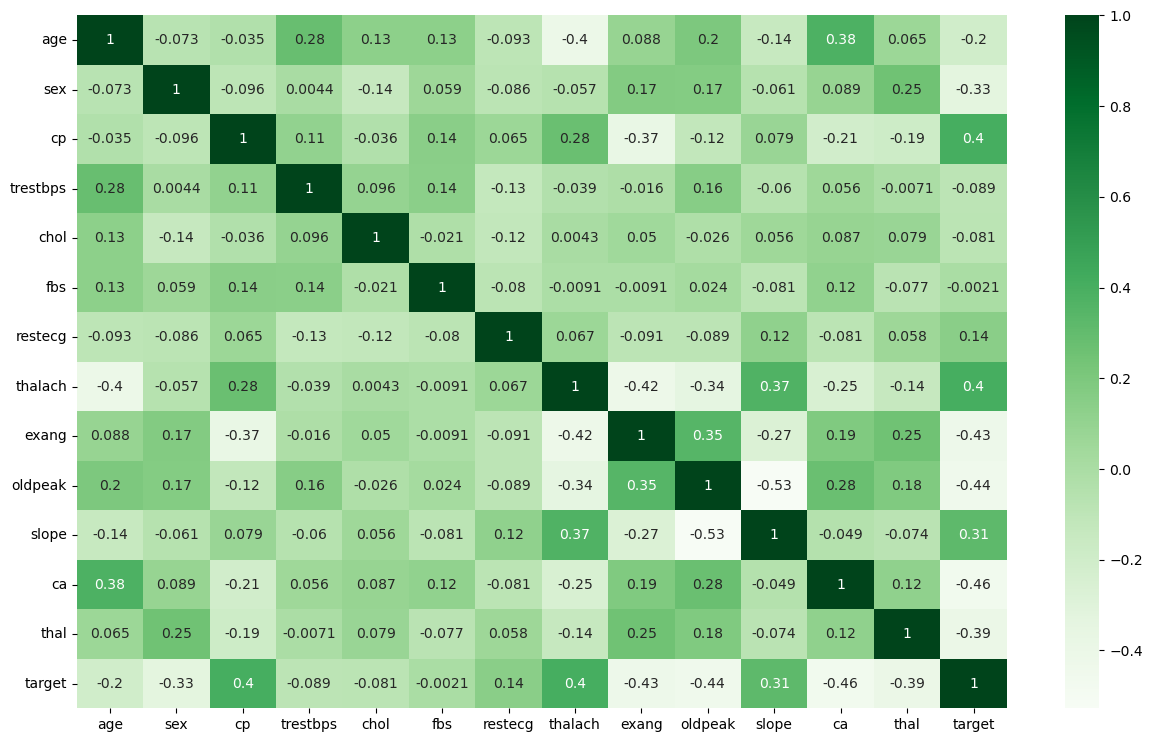

In [26]:
# Correleations
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

Above heatmap is shoing that CP and Thalach has higest +ve corrleation with Target, CA and Oldpeak has -ve correlation with target. 

<AxesSubplot:>

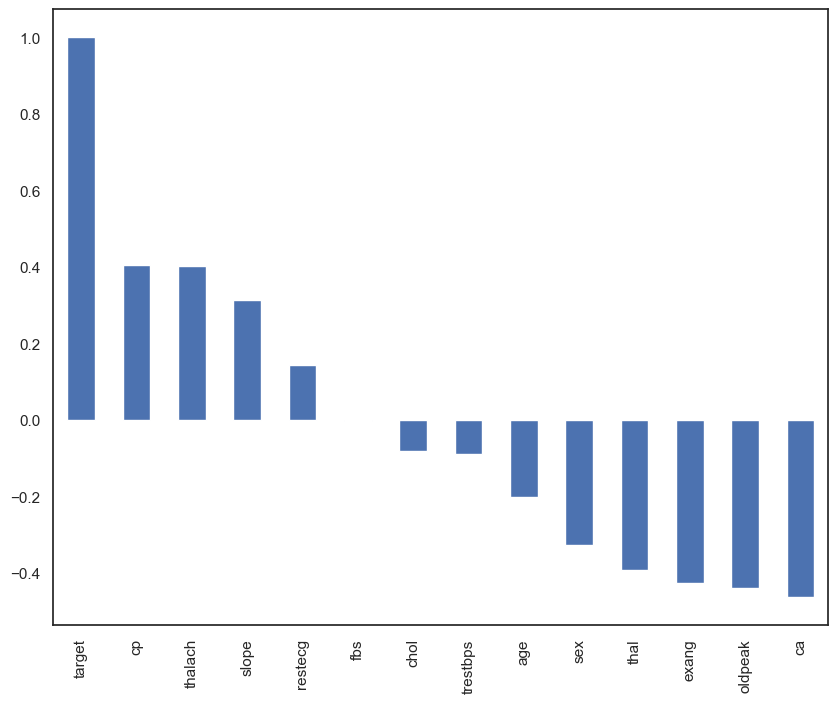

In [27]:
# Another way to see correlation

plt.figure(figsize=(10,8))
sns.set(style='white')
data.corr()['target'].sort_values(ascending=False).plot(kind='bar')

Above barplot is shoing that CP and Thalach has higest +ve corrleation with Target,
CA and Oldpeak has -ve correlation with target. 

# 8.2 VIF (Variance Inflation Factor) # MultiColinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if (data[col].dtypes !="object")& (col!='target'):
        col_list.append(col)

In [29]:
col_list

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [30]:
x=data[col_list]

In [31]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['Vif Values']=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]


In [32]:
vif_data

,feature,Vif Values
0,age,42.937557
1,sex,3.652163
2,cp,2.475109
3,trestbps,70.214879
4,chol,31.734006
5,fbs,1.248188
6,restecg,2.182510
7,thalach,44.625595
8,exang,2.069525
9,oldpeak,3.092812


In [33]:
# in Above data Frame we have to eliminate only those feature whose vales is above 5.
#so in above data frame the highes value is trestps.

x=x.drop(['trestbps'],axis=1)

In [34]:
# Repeat the same process until all VIF values is less than 5.
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['Vif Values']=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif_data

,feature,Vif Values
0,age,29.909015
1,sex,3.630465
2,cp,2.464607
3,chol,30.720801
4,fbs,1.240216
5,restecg,2.179147
6,thalach,35.964287
7,exang,2.060332
8,oldpeak,2.980292
9,slope,10.161775


In [35]:
# Drop the highes value's feature
x=x.drop(['thalach'],axis=1)

In [36]:
# Repeat the same process until all VIF values is less than 5.
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['Vif Values']=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif_data

,feature,Vif Values
0,age,28.521456
1,sex,3.537808
2,cp,2.366867
3,chol,25.465894
4,fbs,1.237426
5,restecg,2.156137
6,exang,1.995840
7,oldpeak,2.958700
8,slope,8.530108
9,ca,1.888741


In [37]:
# Drop the highes value's feature
x=x.drop(['chol'],axis=1)

In [38]:
# Repeat the same process until all VIF values is less than 5.
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['Vif Values']=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif_data

,feature,Vif Values
0,age,19.411454
1,sex,3.520662
2,cp,2.352055
3,fbs,1.237197
4,restecg,2.146264
5,exang,1.984869
6,oldpeak,2.951476
7,slope,7.835029
8,ca,1.871603
9,thal,16.801212


In [39]:
# Drop the highes value's feature
x=x.drop(['age'],axis=1)

In [40]:
# Repeat the same process until all VIF values is less than 5.
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['Vif Values']=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif_data

,feature,Vif Values
0,sex,3.513793
1,cp,2.208368
2,fbs,1.209722
3,restecg,2.143996
4,exang,1.975998
5,oldpeak,2.736316
6,slope,6.479220
7,ca,1.766177
8,thal,11.199785


In [41]:
# Drop the highes value's feature
x=x.drop(['thal'],axis=1)

In [42]:
x

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,1,3,1,0,0,2.3,0,0
1,1,2,0,1,0,3.5,0,0
2,0,1,0,0,0,1.4,2,0
3,1,1,0,1,0,0.8,2,0
4,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0
299,1,3,0,1,0,1.2,1,0
300,1,0,1,1,0,3.4,1,2
301,1,0,0,1,1,1.2,1,1


# 8- Data Spliting and PreProcessing - Standard Scaler

In [43]:
#  Data split into Independent and Dependent variables
X=x  # Independent Variables
y=data.iloc[:,-1]  # Dependent Variables

In [44]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# print the shape of split data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 8)
(79, 8)
(182,)
(79,)


# 9- Modelling

# 9.1 Logistic Regression Model

* Logistic Regression*

Test Accuracy Score: 0.7341772151898734
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        32
           1       0.78      0.77      0.77        47

    accuracy                           0.73        79
   macro avg       0.72      0.73      0.73        79
weighted avg       0.74      0.73      0.73        79



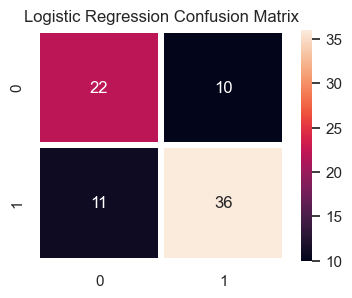

In [45]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print('* Logistic Regression*\n')

print('Test Accuracy Score:', lr.score(X_test,y_test))

print(classification_report(y_test,lr_pred))
      
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,linecolor='white',linewidth=3,fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



# 9.2 Decision Tree Model

* Decision Tree Classifier*

Test Accuracy Score: 0.6962025316455697
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        32
           1       0.76      0.72      0.74        47

    accuracy                           0.70        79
   macro avg       0.69      0.69      0.69        79
weighted avg       0.70      0.70      0.70        79



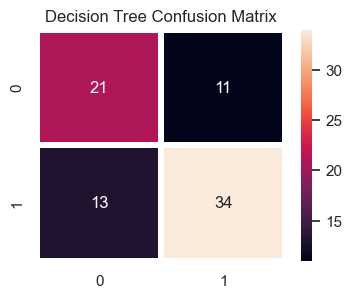

In [46]:
dt=DecisionTreeClassifier(max_depth=4,random_state=30)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

print('* Decision Tree Classifier*\n')

print('Test Accuracy Score:', dt.score(X_test,y_test))

print(classification_report(y_test,dt_pred))
      
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,linecolor='white',linewidth=3,fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


# 9.3 Random Forest Model

* Random Forest Tree Classifier*

Test Accuracy Score: 0.7721518987341772
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.81      0.81      0.81        47

    accuracy                           0.77        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.77      0.77      0.77        79



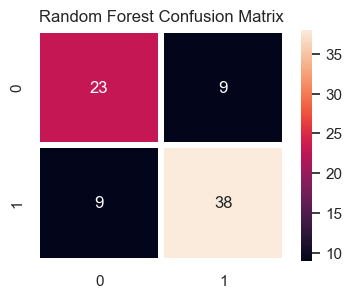

In [47]:
rf=RandomForestClassifier(n_estimators=100,random_state=30)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

print('* Random Forest Tree Classifier*\n')

print('Test Accuracy Score:', rf.score(X_test,y_test))

print(classification_report(y_test,rf_pred))
      
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,linecolor='white',linewidth=3,fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [48]:
# Accuracy Scores of models
print('Test Accuracy Score Logistic Regression :', lr.score(X_test,y_test))
print('Test Accuracy Score Decision Tree :', dt.score(X_test,y_test))
print('Test Accuracy Score Random Forest:', rf.score(X_test,y_test))


Test Accuracy Score Logistic Regression : 0.7341772151898734
Test Accuracy Score Decision Tree : 0.6962025316455697
Test Accuracy Score Random Forest: 0.7721518987341772


# 10- Conclussion

From above models Random Forest model has higher accuracy with 77.21% as compare to other 2 models.
I will prefered to go with model for further analysis with hyperparameter tuninng with same model.